In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn



In [2]:
df = pd.read_csv('all_seasons.csv' , index_col = 0 )

In [3]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Chris Robinson,VAN,23.0,195.58,90.71840,Western Kentucky,USA,1996,2,51,...,4.6,1.7,1.6,-11.4,0.039,0.088,0.155,0.486,0.156,1996-97
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [4]:
df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,9561.000000,9561.000000,9561.000000,9561.000000,9561.000000,9561.000000,9561.000000,9561.000000,9561.000000,9561.000000,9561.000000,9561.000000,9561.000000
mean,27.336157,200.953442,100.975853,53.073528,8.070683,3.565161,1.788516,-2.214413,0.057963,0.142879,0.186582,0.504795,0.130812
std,4.350559,9.281158,12.780883,24.882139,5.888910,2.494161,1.793835,11.545131,0.044568,0.062211,0.052344,0.093493,0.095428
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,195.580000,91.171992,34.000000,3.500000,1.800000,0.500000,-6.400000,0.023000,0.097000,0.152000,0.476000,0.063000
50%,27.000000,203.200000,100.697424,60.000000,6.600000,3.000000,1.200000,-1.400000,0.046000,0.134000,0.184000,0.518000,0.102000
75%,30.000000,208.280000,111.130040,75.000000,11.400000,4.700000,2.400000,3.100000,0.088000,0.184000,0.218000,0.552000,0.178000
max,44.000000,231.140000,163.293120,85.000000,35.400000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.064000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9561 entries, 0 to 9560
Data columns (total 21 columns):
player_name          9561 non-null object
team_abbreviation    9561 non-null object
age                  9561 non-null float64
player_height        9561 non-null float64
player_weight        9561 non-null float64
college              9561 non-null object
country              9561 non-null object
draft_year           9561 non-null object
draft_round          9561 non-null object
draft_number         9561 non-null object
gp                   9561 non-null int64
pts                  9561 non-null float64
reb                  9561 non-null float64
ast                  9561 non-null float64
net_rating           9561 non-null float64
oreb_pct             9561 non-null float64
dreb_pct             9561 non-null float64
usg_pct              9561 non-null float64
ts_pct               9561 non-null float64
ast_pct              9561 non-null float64
season               9561 non-null object


In [6]:
df["Drafted"] = np.where(df["draft_year"] != 'Undrafted', 1,0)

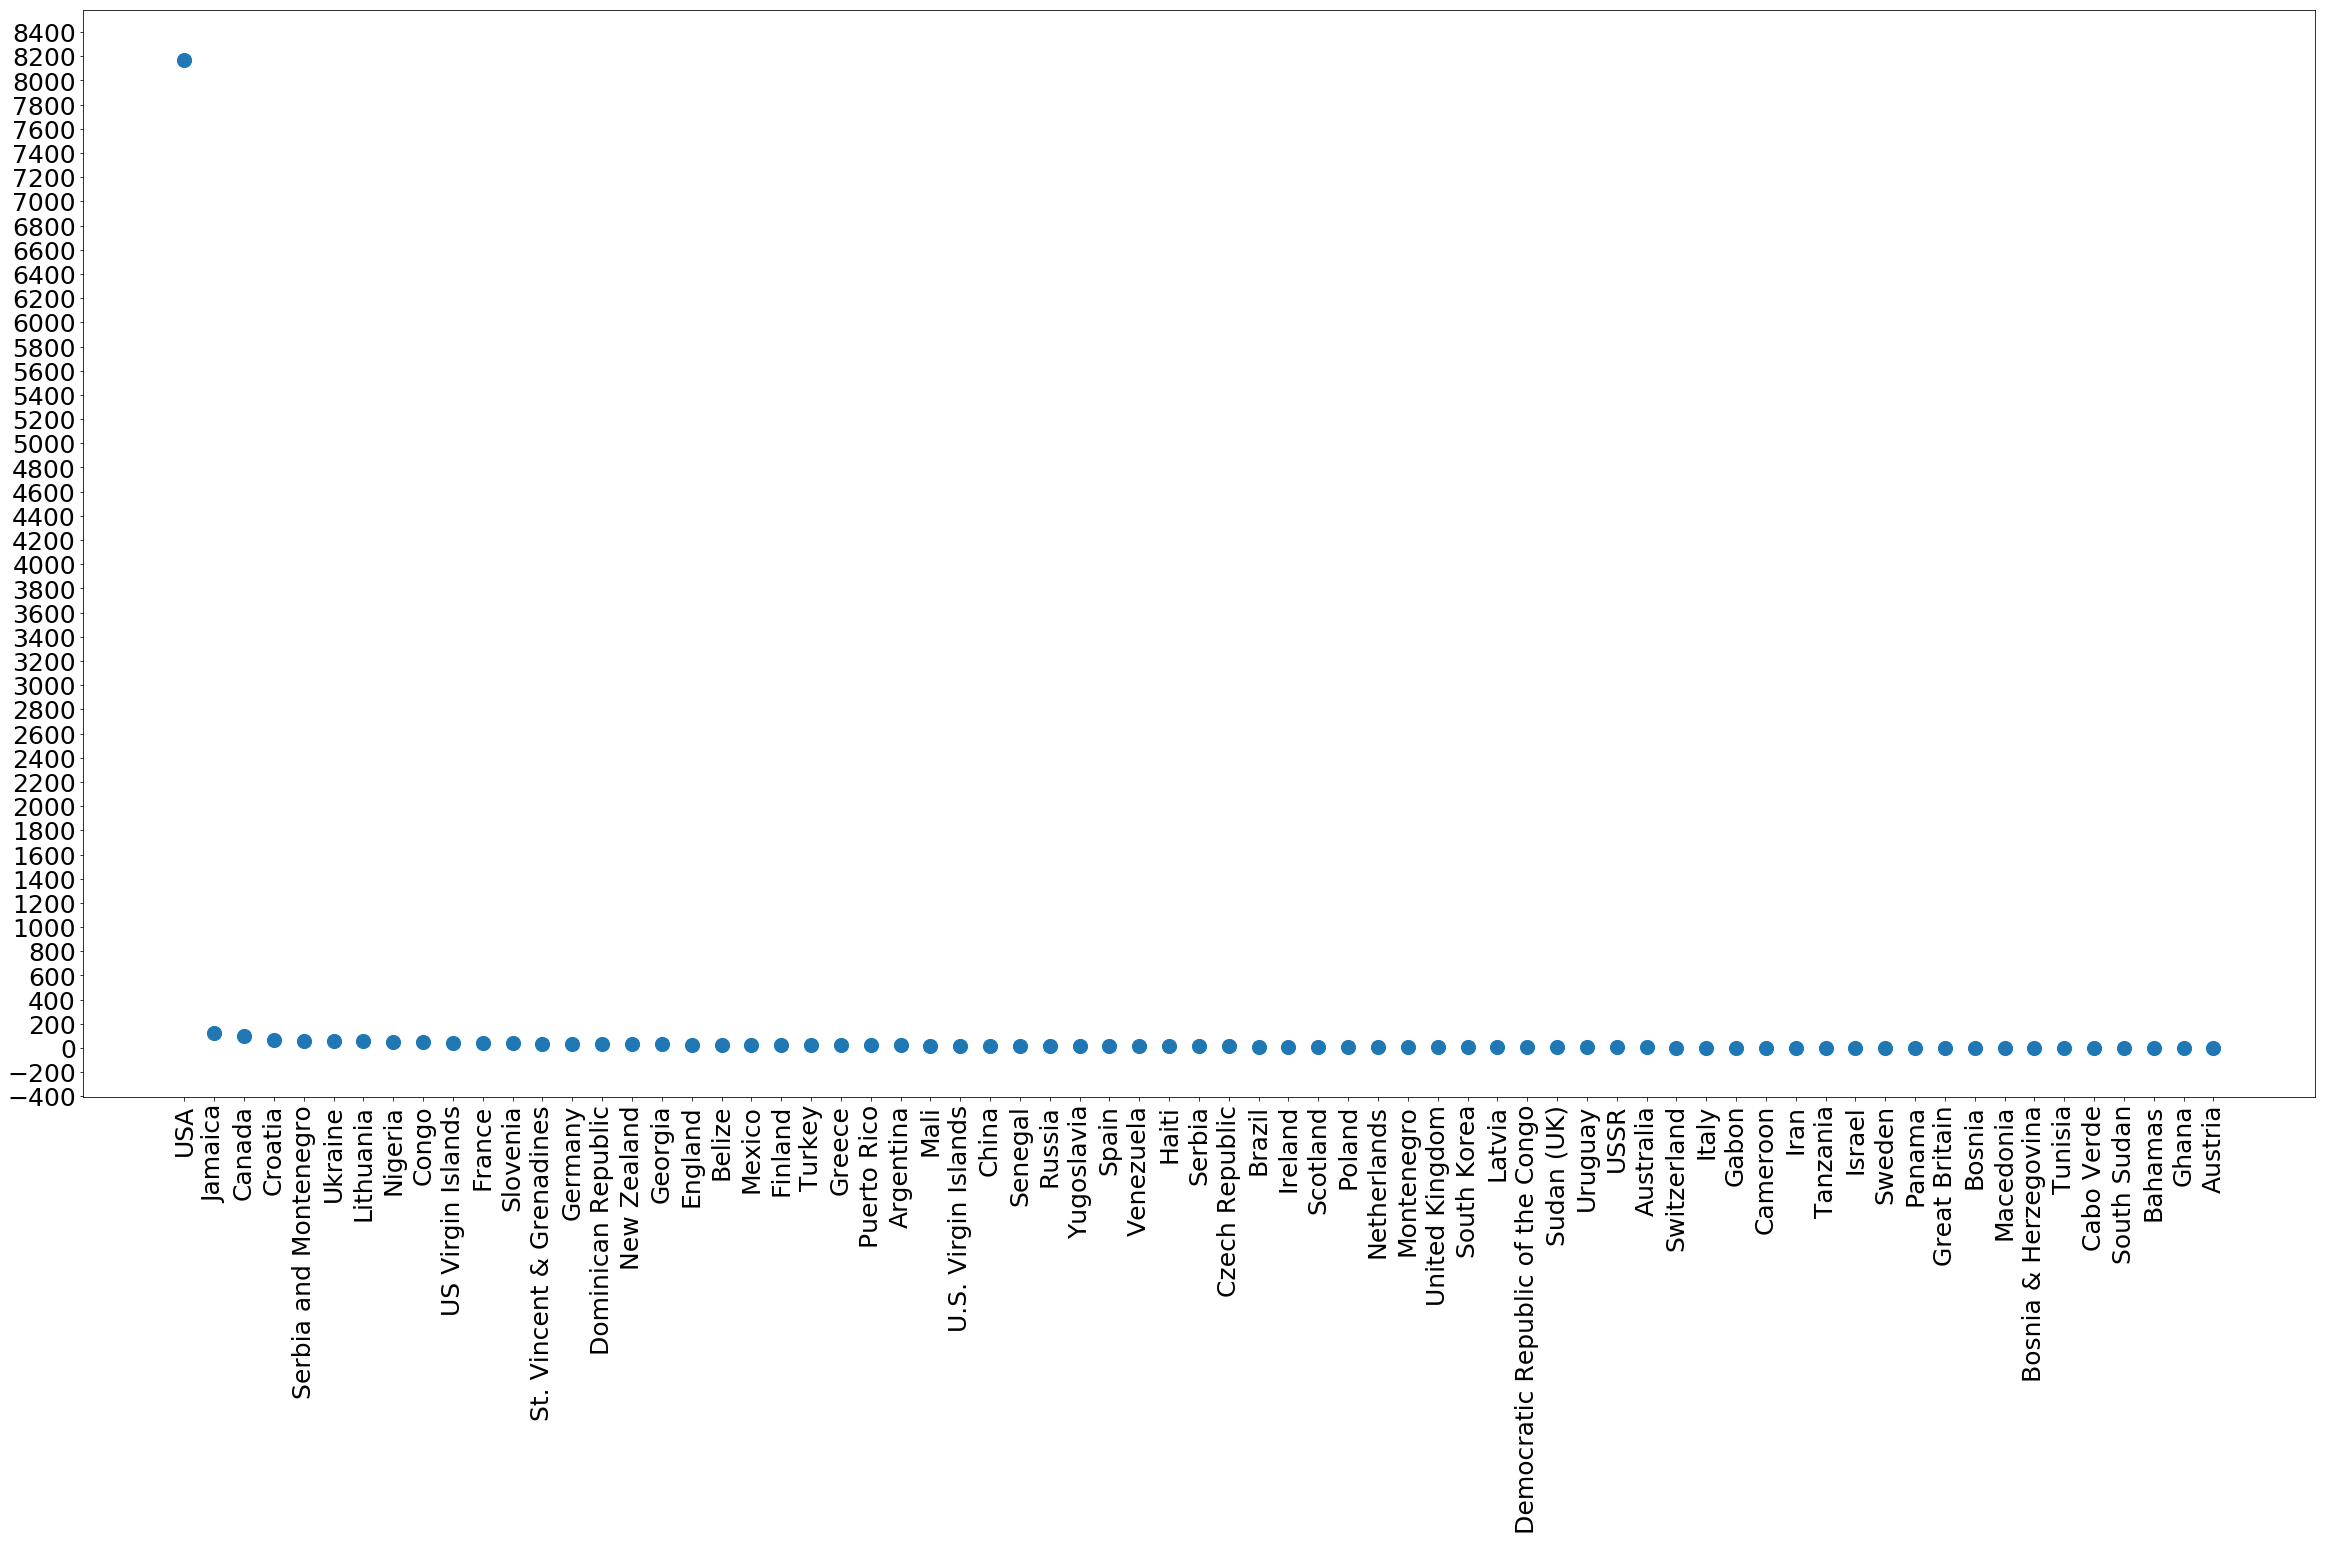

In [7]:
a = list(df["country"].value_counts())
fig, ax = plt.subplots(1, 1, figsize=(40,20))
plt.scatter(df["country"].unique(),a, s=200)
x=plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)
    item.set_fontsize(25)
y=plt.gca().yaxis
for y in y.get_ticklabels():
    y.set_fontsize(25)
plt.locator_params(axis='y', nbins=50)
# plt.locator_params(axis='x', nbins=10)

In [8]:
len(df[df["Drafted"]==1])

8017

In [9]:
categoricals = df.select_dtypes(exclude=[np.number])
categoricals.describe()

,player_name,team_abbreviation,college,country,draft_year,draft_round,draft_number,season
count,9561,9561,9561,9561,9561,9561,9561,9561
unique,1892,36,288,69,42,8,75,21
top,Kobe Bryant,TOR,None,USA,Undrafted,1,Undrafted,2014-15
freq,20,338,1349,8173,1544,5684,1560,492


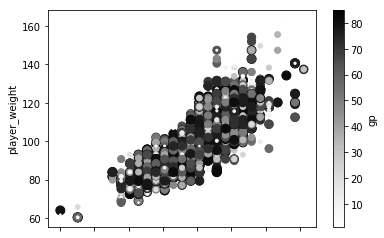

In [10]:
df.plot('player_height','player_weight', c = 'gp', kind = 'scatter' , s= df["gp"])
x = plt.gca().xaxis
# x.set_label("player_height")
# plt.xlabel("ax")

In [11]:
df["year"] = df['season'].apply(lambda x : x[:4])

In [12]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,Drafted,year
0,Chris Robinson,VAN,23.0,195.58,90.71840,Western Kentucky,USA,1996,2,51,...,1.6,-11.4,0.039,0.088,0.155,0.486,0.156,1996-97,1,1996
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,...,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97,1,1996
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,...,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97,0,1996
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,...,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97,0,1996
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,...,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97,1,1996


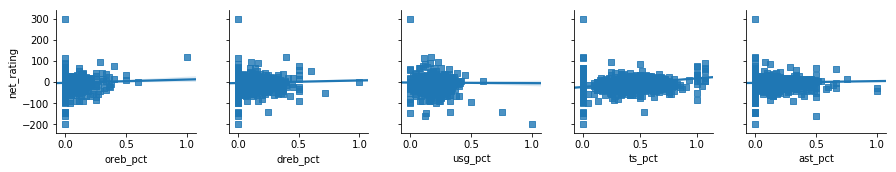

In [13]:
sn.pairplot(df, x_vars = ["oreb_pct", "dreb_pct","usg_pct","ts_pct","ast_pct"],
                           y_vars = ["net_rating"], kind = "reg" , markers = ["s"])

Text(0,0.5,'defensive_rebound_score')

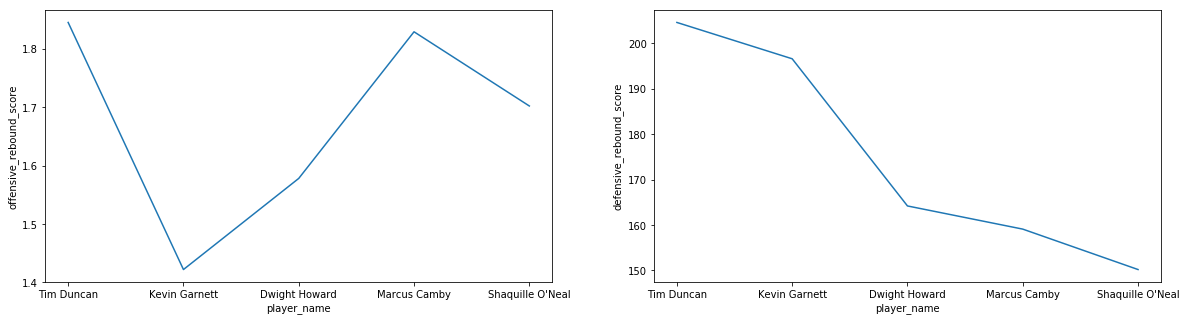

In [14]:
highest_offensive_rebound= df.groupby('player_name').agg({'oreb_pct':'sum', 'reb':'sum'})
highest_offensive_rebound.sort_values(["reb",'oreb_pct'] , ascending=[0,0], inplace = True)
highest_offensive_rebound.reset_index(inplace=True)
fig,(ax1,ax2) = plt.subplots(1,2,sharex=False, sharey=False, figsize = (20,5))
ax1.plot(highest_offensive_rebound["player_name"][:5], highest_offensive_rebound["oreb_pct"][:5])
ax2.plot(highest_offensive_rebound["player_name"][:5], highest_offensive_rebound["reb"][:5])
ax1.set_xlabel("player_name")
ax1.set_ylabel("offensive_rebound_score")
ax2.set_xlabel("player_name")
ax2.set_ylabel("defensive_rebound_score")

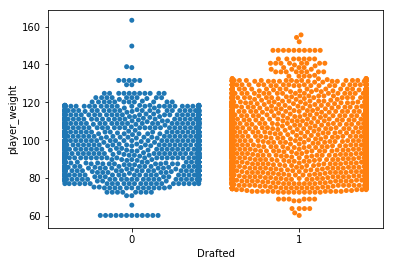

In [15]:
sn.swarmplot('Drafted', 'player_weight', data=df);

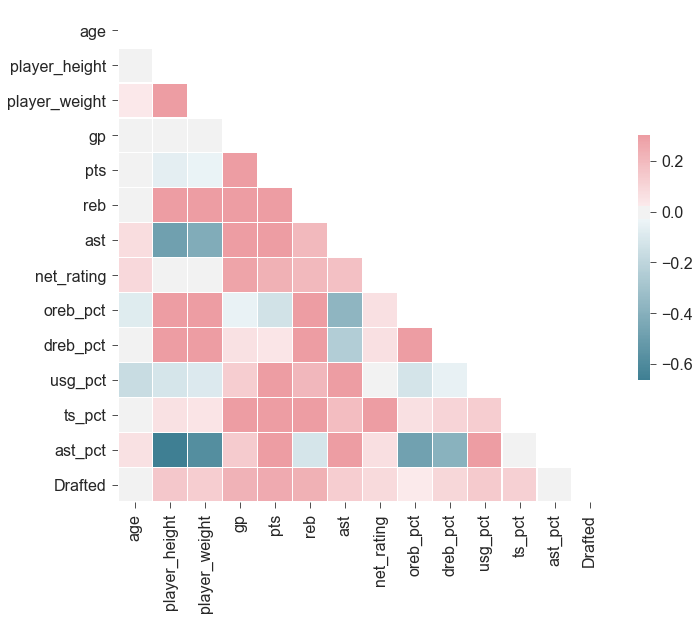

In [18]:
sn.set_style('ticks')
sn.set_context("paper",font_scale=2)
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
# print(mask)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink":0.5} )

In [19]:
corr

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Drafted
age,1.000000,-0.016669,0.033497,0.016466,-0.017338,0.018834,0.074837,0.092893,-0.080729,0.008625,-0.162418,0.016699,0.058643,-0.017443
player_height,-0.016669,1.000000,0.835145,-0.022285,-0.066217,0.419341,-0.484526,-0.007565,0.592262,0.623912,-0.118415,0.056144,-0.661633,0.150221
player_weight,0.033497,0.835145,1.000000,-0.009437,-0.041651,0.432224,-0.418255,-0.005088,0.605133,0.617183,-0.087555,0.046436,-0.580155,0.132898
gp,0.016466,-0.022285,-0.009437,1.000000,0.550435,0.472073,0.391868,0.280920,-0.043927,0.058167,0.129946,0.414026,0.135885,0.228822
pts,-0.017338,-0.066217,-0.041651,0.550435,1.000000,0.620041,0.642045,0.232434,-0.131123,0.043773,0.629873,0.393099,0.311400,0.253775
reb,0.018834,0.419341,0.432224,0.472073,0.620041,1.000000,0.202248,0.204837,0.409848,0.615650,0.208475,0.315240,-0.114846,0.232522
ast,0.074837,-0.484526,-0.418255,0.391868,0.642045,0.202248,1.000000,0.177089,-0.370133,-0.239821,0.362899,0.186745,0.804351,0.127616
net_rating,0.092893,-0.007565,-0.005088,0.280920,0.232434,0.204837,0.177089,1.000000,0.060331,0.065735,-0.013161,0.333759,0.069216,0.082300
oreb_pct,-0.080729,0.592262,0.605133,-0.043927,-0.131123,0.409848,-0.370133,0.060331,1.000000,0.567606,-0.122639,0.059655,-0.474193,0.028949
dreb_pct,0.008625,0.623912,0.617183,0.058167,0.043773,0.615650,-0.239821,0.065735,0.567606,1.000000,-0.052250,0.107706,-0.387963,0.096674
